In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [27]:
X = mnist['data']
y = mnist['target']

In [28]:
X.shape

(70000, 784)

In [29]:
y.shape

(70000,)

In [30]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [31]:
number = X[0].reshape(28,28)

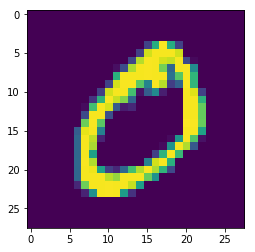

In [32]:
plt.imshow(number)

In [33]:
y[0]

0.0

In [34]:
X_train = X[:60000]
X_test  = X[60000:]
y_train = y[:60000]
y_test  = y[60000:]

In [35]:
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train = X_train[shuffle_index]
y_train = y_train[shuffle_index]

In [36]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [37]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)

In [38]:
from sklearn.model_selection import StratifiedKFold

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_folds = X_train[test_index]
    y_test_folds = y_train_5[test_index]
    
    sgd_clf.fit(X_train_folds, y_train_folds)
    y_pred = sgd_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.84765
0.8573
0.8067


In [39]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.96875, 0.9618 , 0.9431 ])

In [40]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53360,  1219],
       [ 1308,  4113]])

In [42]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))

0.7713803450862715
0.758716104039845


In [43]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7649958151213614

In [44]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.96875, 0.9618 , 0.9431 ])

In [45]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

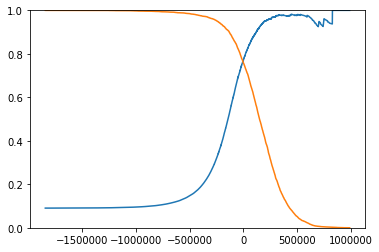

In [46]:
plt.plot(thresholds, precisions[:-1])
plt.plot(thresholds, recalls[:-1])
plt.ylim([0,1])
plt.show()

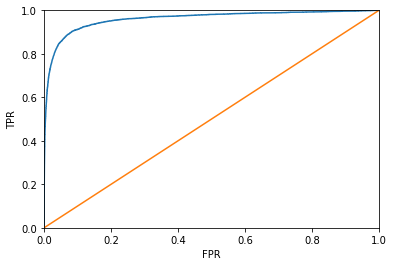

In [61]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
plt.plot(fpr,tpr)
plt.plot([0,1])
plt.axis([0,1,0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [66]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

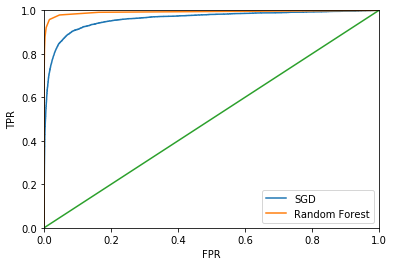

In [68]:
plt.plot(fpr, tpr, label='SGD')
plt.plot(fpr_forest, tpr_forest, label='Random Forest')
plt.plot([0,1])
plt.axis([0,1,0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

In [69]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train_5, y_scores))
print(roc_auc_score(y_train_5, y_scores_forest))

0.9608226453858836
0.9920504509845733
